<a href="https://colab.research.google.com/github/Nischhal9205/Python-and-ML-for-OIL-and-GAS-Industry/blob/main/Skin_effect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

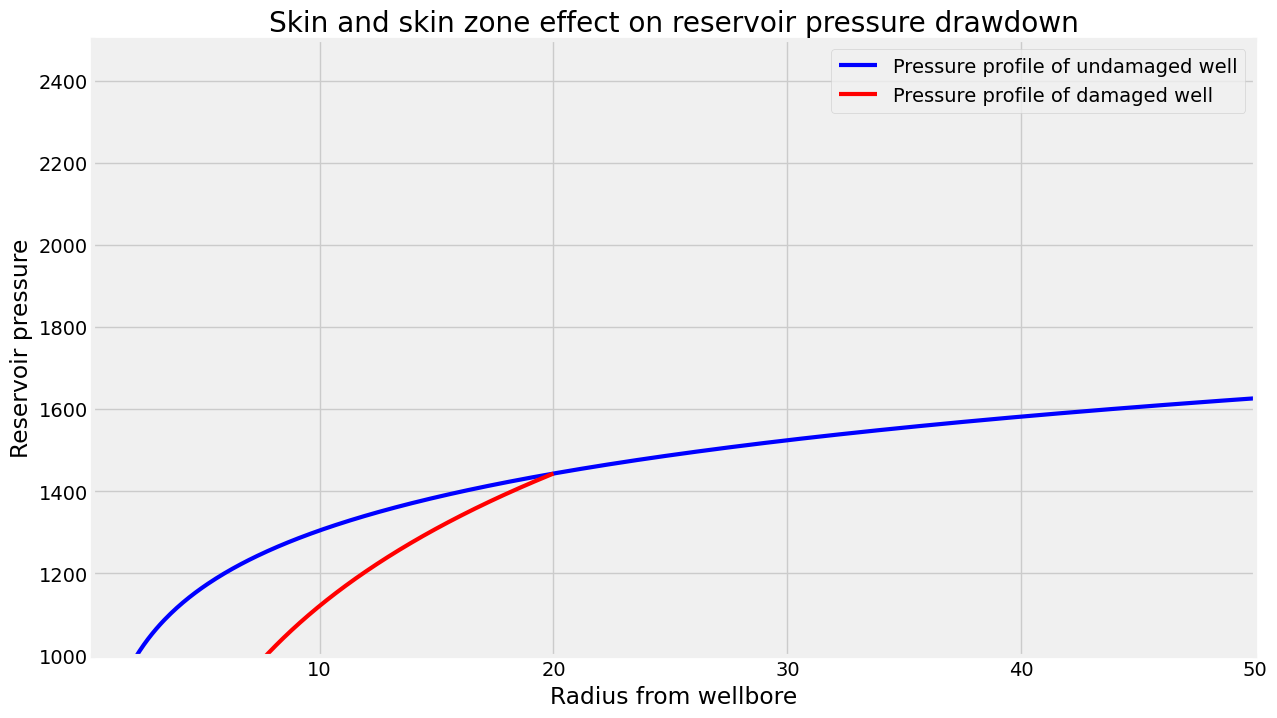

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generating synthetic data
np.random.seed(42)
k = np.random.uniform(50, 200)  # permeability (md)
q = np.random.uniform(500, 1000)  # oil flow (bbl/day)
Bo = np.random.uniform(1, 2)  # oil formation volume factor
mu = np.random.uniform(1, 3)  # oil viscosity (cp)
h = np.random.uniform(20, 50)  # thickness of reservoir (ft)
pe = np.random.uniform(2000, 3000)  # reservoir boundary pressure (psi)
re = np.random.uniform(700, 800)  # outer reservoir radius (ft)
rw = np.random.uniform(0.2, 0.5)  # wellbore radius (ft)

# Creating a radius array
r = np.linspace(rw, re, 8000)

# Creating a DataFrame
df = pd.DataFrame({"r": r})
df["p"] = pe - ((141.2 * q * Bo * mu * np.log(re / df["r"])) / (k * h))

# Function to simulate skin effect
def skin_effect(s, rs):
    plt.figure(figsize=(15, 8))
    plt.style.use("fivethirtyeight")

    ks = (k * (np.log(rs / rw)) / (5 + np.log(rs / rw)))
    t = np.linspace(rw, rs, 1000)
    sf = pd.DataFrame({'t': t})
    sf["q"] = pe - (141.2 * q * Bo * mu * (((np.log(re / rs)) / k) + (np.log(rs / sf["t"])) / ks)) / h

    plt.plot(df["r"], df["p"], c="b", label="Pressure profile of undamaged well", lw=3)
    plt.plot(sf["t"], sf["q"], c="r", label="Pressure profile of damaged well", lw=3)

    plt.xlim(0.3, 50)
    plt.ylim(1000, 2500)
    plt.xlabel("Radius from wellbore")
    plt.ylabel("Reservoir pressure")
    plt.legend()
    plt.title("Skin and skin zone effect on reservoir pressure drawdown")
    plt.grid(True)
    plt.show()

# Example usage
skin_effect(5, 20)